# IE598 MLF F18

Using the ccdefault dataset, and 10 fold cross validation described in Raschka; 

## Part 1: Random forest estimators

Fit a random forest model, try several different values for N_estimators, report in-sample accuracies. 

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import time
from pandas import DataFrame as df

In [2]:
ccdefault = pd.read_csv("D:/UIUC_Course/Machine Learning/Module6//ccdefault.csv")
ccdefault.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
np_ccdefault = np.array(ccdefault)
X = np_ccdefault[:,1:24]
y = np_ccdefault[:,24]
estimators_list = [ 25,50,75,100,125,150,175,200,250,300,350,400,500]
out_sample_scores = []
cv_means=[]
running_time = []

In [5]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.1,
                                                   stratify=y,
                                                   random_state = 1)
for n in estimators_list:
    timestamp_1 = time.time()
    forest = RandomForestClassifier(criterion='gini',
                                    n_estimators=n,
                                    random_state=1,
                                    n_jobs=-1)
    forest.fit(X_train, y_train)
    
    cv_scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, n_jobs=-1)
    cv_means.append(np.mean(cv_scores))
    
    y_test_pred = forest.predict(X_test)
    out_sample_scores.append(accuracy_score(y_test, y_test_pred))
    
    timestamp_2 = time.time()
    running_time.append(timestamp_2 - timestamp_1)
    

In [6]:
cv_means

[0.8129636387238645,
 0.8157416910330013,
 0.8150006072601554,
 0.8157784125235846,
 0.8158894962100106,
 0.8162599352233819,
 0.8164451066759024,
 0.8168154221765809,
 0.8161115950008284,
 0.8163338446477356,
 0.816593131372324,
 0.8163337897983658,
 0.816407863902923]

In [7]:
out_sample_scores

[0.8156666666666667,
 0.8196666666666667,
 0.819,
 0.8203333333333334,
 0.8216666666666667,
 0.821,
 0.82,
 0.8186666666666667,
 0.8196666666666667,
 0.819,
 0.8186666666666667,
 0.8193333333333334,
 0.8176666666666667]

In [8]:
running_time

[11.927680492401123,
 18.079702377319336,
 26.790794610977173,
 36.11043858528137,
 44.702062368392944,
 52.91289973258972,
 63.802709341049194,
 70.38847947120667,
 88.819753408432,
 108.38555359840393,
 128.69409704208374,
 145.73438429832458,
 178.69421100616455]

In [9]:
accuracy_table=df({"Estimators_List":estimators_list,
        "10-flod_Cross_Validatoin_Scores":cv_means,
        "Out_of_Sample_Accuracy_Scores":out_sample_scores,
        "Running_Time":running_time})
accuracy_table

,Estimators_List,10-flod_Cross_Validatoin_Scores,Out_of_Sample_Accuracy_Scores,Running_Time
0,25,0.812964,0.815667,11.927680
1,50,0.815742,0.819667,18.079702
2,75,0.815001,0.819000,26.790795
3,100,0.815778,0.820333,36.110439
4,125,0.815889,0.821667,44.702062
5,150,0.816260,0.821000,52.912900
6,175,0.816445,0.820000,63.802709
7,200,0.816815,0.818667,70.388479
8,250,0.816112,0.819667,88.819753
9,300,0.816334,0.819000,108.385554


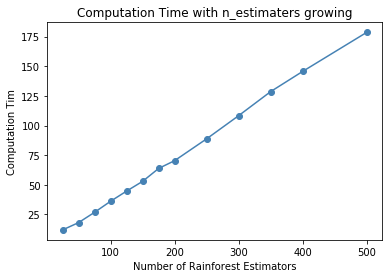

In [11]:
plt.xlabel('Number of Rainforest Estimators')
plt.ylabel('Computation Tim')
plt.title("Computation Time with n_estimaters growing")
plt.plot(estimators_list,running_time,c='steelblue', marker='o',label='Computation Time')
plt.show()

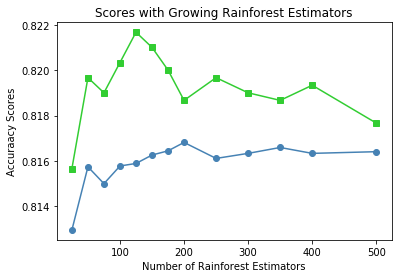

In [12]:
plt.xlabel('Number of Rainforest Estimators')
plt.ylabel('Accuraacy Scores')
plt.title("Scores with Growing Rainforest Estimators")
plt.plot(estimators_list,cv_means,c='steelblue', marker='o',label='Out of Sample CV Score')
plt.plot(estimators_list,out_sample_scores,c='limegreen', marker='s',label='In Sample Accuracy Score')
plt.show()

## Part 2: Random forest feature importance

Display the individual feature importance of your best model in Part 1 above using the code presented in Chapter 4 on page 136. {importances=forest.feature_importances_ }

In [13]:
feat_labels = ccdefault.columns[1:24]
feat_labels

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

 1) PAY_0                          0.095263
 2) AGE                            0.067765
 3) BILL_AMT1                      0.060900
 4) LIMIT_BAL                      0.060055
 5) BILL_AMT2                      0.054563
 6) BILL_AMT3                      0.052115
 7) BILL_AMT6                      0.050414
 8) PAY_AMT1                       0.050305
 9) BILL_AMT4                      0.050253
10) BILL_AMT5                      0.049639
11) PAY_AMT2                       0.048203
12) PAY_2                          0.048059
13) PAY_AMT3                       0.046629
14) PAY_AMT6                       0.045892
15) PAY_AMT4                       0.043523
16) PAY_AMT5                       0.043482
17) PAY_3                          0.026382
18) PAY_4                          0.022653
19) EDUCATION                      0.020544
20) PAY_5                          0.018764
21) PAY_6                          0.018551
22) MARRIAGE                       0.013955
23) SEX                         

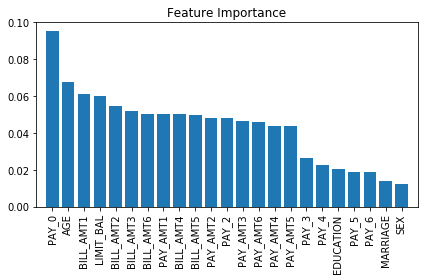

In [16]:
feat_labels = ccdefault.columns[1:24]
forest = RandomForestClassifier(n_estimators=200,random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
    feat_labels[indices[f]],
    importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [59]:
print("My name is Jialing Zhu")
print("My NetID is: jz72")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jialing Zhu
My NetID is: jz72
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
